# 0. Installing dependencies

In [2]:
# Importing libraries
import matplotlib.pyplot as plt
import plotly.express as px

import seaborn as sns
import pandas as pd
import numpy as np
import torch

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# 1. Loading data

In [3]:
# Loading downloaded FIDE data into pandas
csvPath = r'C:\Users\deshi\code\cemetery-of-culture\year-3\neural-networks\2-eda-and-tensors\Chess FIDE Rankings.csv'

df = pd.read_csv(csvPath)

In [4]:
# Printing the dataset
df

,rank,name,ELO,title,federation,games,birth_year
0,1,Magnus Carlsen,2864,GM,Norway,3125,1990
1,2,Liren Ding,2806,GM,China,1630,1992
2,3,Alireza Firouzja,2793,GM,France,845,2003
3,4,Fabiano Caruana,2783,GM,United States,2622,1992
4,5,Levon Aronian,2775,GM,United States,3320,1982
...,...,...,...,...,...,...,...
195,196,Boris Alterman,2608,GM,Israel,697,1970
196,197,Chithambaram VR Aravindh,2608,GM,India,535,1999
197,198,Jonas Buhl Bjerre,2608,GM,Denmark,411,2004
198,199,Surya Shekhar Ganguly,2608,GM,India,1811,1983


# 2. Data cleaning

In [5]:
# Print data types of all the cols
df.dtypes

rank            int64
name           object
ELO             int64
title          object
federation     object
games           int64
birth_year      int64
dtype: object

In [6]:
# Updating the column names
newColList = [
    'Rank',
    'Name',
    'Rating',
    'Title',
    'Federation',
    'Games Played',
    'Year of Birth'
]

df.columns = newColList

In [7]:
# Columns of the dataset as a list
df.columns.to_list()

['Rank',
 'Name',
 'Rating',
 'Title',
 'Federation',
 'Games Played',
 'Year of Birth']

In [8]:
df = df.set_index('Rank')

In [9]:
df

,Name,Rating,Title,Federation,Games Played,Year of Birth
Rank,,,,,,
1,Magnus Carlsen,2864,GM,Norway,3125,1990
2,Liren Ding,2806,GM,China,1630,1992
3,Alireza Firouzja,2793,GM,France,845,2003
4,Fabiano Caruana,2783,GM,United States,2622,1992
5,Levon Aronian,2775,GM,United States,3320,1982
...,...,...,...,...,...,...
196,Boris Alterman,2608,GM,Israel,697,1970
197,Chithambaram VR Aravindh,2608,GM,India,535,1999
198,Jonas Buhl Bjerre,2608,GM,Denmark,411,2004


In [10]:
df.drop('Title', axis=1, inplace=True)

# 3. Exploring the data

In [11]:
# Display number of dimensions
df.ndim

2

In [12]:
# Display 
df.size

1000

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Name           200 non-null    object
 1   Rating         200 non-null    int64 
 2   Federation     200 non-null    object
 3   Games Played   200 non-null    int64 
 4   Year of Birth  200 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 9.4+ KB


In [14]:
# Check the shape of data
df.shape

(200, 5)

In [15]:
df.describe()

,Rating,Games Played,Year of Birth
count,200.000000,200.000000,200.000000
mean,2662.385000,1394.185000,1989.395000
std,47.208793,776.177129,9.057548
min,2608.000000,277.000000,1965.000000
25%,2623.750000,785.000000,1984.000000
50%,2650.500000,1211.000000,1990.000000
75%,2686.000000,1784.000000,1996.000000
max,2864.000000,3913.000000,2006.000000


In [16]:
# Easier command to display the list of columns
list(df)

['Name', 'Rating', 'Federation', 'Games Played', 'Year of Birth']

In [17]:
# Stats for games played
df['Games Played'].describe()

count     200.000000
mean     1394.185000
std       776.177129
min       277.000000
25%       785.000000
50%      1211.000000
75%      1784.000000
max      3913.000000
Name: Games Played, dtype: float64

In [18]:
# Stats for rating points
df['Rating'].describe()

count     200.000000
mean     2662.385000
std        47.208793
min      2608.000000
25%      2623.750000
50%      2650.500000
75%      2686.000000
max      2864.000000
Name: Rating, dtype: float64

In [19]:
# All the top chess players with a rating of more than 2700
df[
    df['Rating'] > 2700
]

,Name,Rating,Federation,Games Played,Year of Birth
Rank,,,,,
1,Magnus Carlsen,2864,Norway,3125,1990
2,Liren Ding,2806,China,1630,1992
3,Alireza Firouzja,2793,France,845,2003
4,Fabiano Caruana,2783,United States,2622,1992
5,Levon Aronian,2775,United States,3320,1982
6,Wesley So,2773,United States,1902,1993
7,Ian Nepomniachtchi,2766,Russian Federation,2297,1990
8,Richard Rapport,2764,Hungary,1278,1996
9,Anish Giri,2760,Netherlands,2209,1994


In [20]:
# Find all the players born in the 00s
df[
    df['Year of Birth'] >= 2000
].sort_values(
    by=['Year of Birth'], 
    ascending=False
)

,Name,Rating,Federation,Games Played,Year of Birth
Rank,,,,,
53,Gukesh D,2684,India,569,2006
187,Raunak Sadhwani,2611,India,511,2005
144,Javokhir Sindarov,2629,Uzbekistan,389,2005
107,Praggnanandhaa R,2648,India,496,2005
198,Jonas Buhl Bjerre,2608,Denmark,411,2004
100,Nihal Sarin,2651,India,676,2004
45,Nodirbek Abdusattorov,2688,Uzbekistan,570,2004
50,Vincent Keymer,2686,Germany,392,2004
148,Awonder Liang,2625,United States,429,2003


In [21]:
# Finding out highest rated player born in the 90s
df[
    (df['Rating'] > 2700) & (df['Year of Birth'] > 1990)
]

,Name,Rating,Federation,Games Played,Year of Birth
Rank,,,,,
2,Liren Ding,2806,China,1630,1992
3,Alireza Firouzja,2793,France,845,2003
4,Fabiano Caruana,2783,United States,2622,1992
6,Wesley So,2773,United States,1902,1993
8,Richard Rapport,2764,Hungary,1278,1996
9,Anish Giri,2760,Netherlands,2209,1994
15,Jan Krzysztof Duda,2750,Poland,1213,1998
22,Yi Wei,2727,China,979,1999
23,Quang Liem Le,2722,Viet Nam,1725,1991


In [22]:
# Finding out player with the least amount of games
df.sort_values(
    by=['Games Played'],
    ascending=True
).head(10)

,Name,Rating,Federation,Games Played,Year of Birth
Rank,,,,,
188,Aryan Chopra,2610,India,277,2001
157,Cristobal Henriquez Villagra,2620,Chile,320,1996
161,Nodirbek Yakubboev,2620,Uzbekistan,364,2002
84,Qun Ma,2666,China,366,1991
144,Javokhir Sindarov,2629,Uzbekistan,389,2005
50,Vincent Keymer,2686,Germany,392,2004
198,Jonas Buhl Bjerre,2608,Denmark,411,2004
176,Neuris Delgado Ramirez,2614,Paraguay,415,1981
193,Max Warmerdam,2610,Netherlands,421,2000


In [23]:
df.sort_values(
    by=['Games Played'], 
    ascending=False
).head(10)

,Name,Rating,Federation,Games Played,Year of Birth
Rank,,,,,
13,Viswanathan Anand,2756,India,3913,1969
150,Loek Van Wely,2624,Netherlands,3749,1972
32,Alexei Shirov,2704,Spain,3578,1972
79,Boris Gelfand,2668,Israel,3394,1968
190,Aleksey Dreev,2610,Russian Federation,3360,1969
5,Levon Aronian,2775,United States,3320,1982
57,Peter Svidler,2683,Russian Federation,3260,1976
17,Alexander Grischuk,2745,Russian Federation,3235,1983
10,Hikaru Nakamura,2760,United States,3147,1987


In [24]:
df['Federation'].value_counts()

Russian Federation       22
United States            19
India                    17
Ukraine                  13
FIDE                     12
China                    12
Germany                   9
Armenia                   9
France                    7
Azerbaijan                7
Spain                     6
Netherlands               6
United Kingdom            5
Poland                    5
Hungary                   5
Israel                    4
Uzbekistan                4
Czech Republic            3
Norway                    3
Iran                      3
Romania                   2
Viet Nam                  2
Croatia                   2
Bulgaria                  2
Argentina                 2
Serbia                    2
Tajikistan                1
Denmark                   1
Uruguay                   1
Paraguay                  1
Italy                     1
Kazakhstan                1
Chile                     1
Turkey                    1
Canada                    1
Slovenia            

In [25]:
df.corr()

,Rating,Games Played,Year of Birth
Rating,1.000000,0.390230,0.078851
Games Played,0.390230,1.000000,-0.674625
Year of Birth,0.078851,-0.674625,1.000000


# 4. Data Visualisation

In [26]:
plt.figure(figsize=(18, 3))
px.treemap(df, path=['Federation'], title='')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'branchvalues': 'total',
              'domain': {'x': [0.0, 1.0], 'y': [0.0, 1.0]},
              'hovertemplate': 'labels=%{label}<br>count=%{value}<br>parent=%{parent}<br>id=%{id}<extra></extra>',
              'ids': array(['Argentina ', 'Armenia ', 'Austria ', 'Azerbaijan ', 'Bulgaria ',
                            'Canada ', 'Chile ', 'China ', 'Croatia ', 'Czech Republic ',
                            'Denmark ', 'Egypt ', 'FIDE ', 'France ', 'Germany ', 'Greece ',
                            'Hungary ', 'India ', 'Iran ', 'Israel ', 'Italy ', 'Kazakhstan ',
                            'Netherlands ', 'Norway ', 'Paraguay ', 'Peru ', 'Poland ', 'Romania ',
                            'Russian Federation ', 'Serbia ', 'Slovenia ', 'Spain ', 'Sweden ',
                            'Switzerland ', 'Tajikistan ', 'Turkey ', 'Ukraine ',
                            'United Arab Emirates ', 'United Kingdom ', 'United States ',
                            'Uruguay ', 'Uzbekistan ', 'Viet Nam '], dtype=object),
              'labels': array(['Argentina ', 'Armenia ', 'Austria ', 'Azerbaijan ', 'Bulgaria ',
                               'Canada ', 'Chile ', 'China ', 'Croatia ', 'Czech Republic ',
                               'Denmark ', 'Egypt ', 'FIDE ', 'France ', 'Germany ', 'Greece ',
                               'Hungary ', 'India ', 'Iran ', 'Israel ', 'Italy ', 'Kazakhstan ',
                               'Netherlands ', 'Norway ', 'Paraguay ', 'Peru ', 'Poland ', 'Romania ',
                               'Russian Federation ', 'Serbia ', 'Slovenia ', 'Spain ', 'Sweden ',
                               'Switzerland ', 'Tajikistan ', 'Turkey ', 'Ukraine ',
                               'United Arab Emirates ', 'United Kingdom ', 'United States ',
                               'Uruguay ', 'Uzbekistan ', 'Viet Nam '], dtype=object),
              'name': '',
              'parents': array(['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '',
                                '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '',
                                '', '', '', '', '', '', ''], dtype=object),
              'type': 'treemap',
              'values': array([ 2,  9,  1,  7,  2,  1,  1, 12,  2,  3,  1,  1, 12,  7,  9,  1,  5, 17,
                                3,  4,  1,  1,  6,  3,  1,  1,  5,  2, 22,  2,  1,  6,  1,  1,  1,  1,
                               13,  1,  5, 19,  1,  4,  2], dtype=int64)}],
    'layout': {'legend': {'tracegroupgap': 0}, 'margin': {'t': 60}, 'template': '...'}
})

<Figure size 1800x300 with 0 Axes>

In [27]:
numericData = df[
    ['Rating', 'Games Played', 'Year of Birth']
]


In [28]:
numericData


,Rating,Games Played,Year of Birth
Rank,,,
1,2864,3125,1990
2,2806,1630,1992
3,2793,845,2003
4,2783,2622,1992
5,2775,3320,1982
...,...,...,...
196,2608,697,1970
197,2608,535,1999
198,2608,411,2004


array([[<AxesSubplot:title={'center':'Rating'}>,
        <AxesSubplot:title={'center':'Games Played'}>],
       [<AxesSubplot:title={'center':'Year of Birth'}>, <AxesSubplot:>]],
      dtype=object)

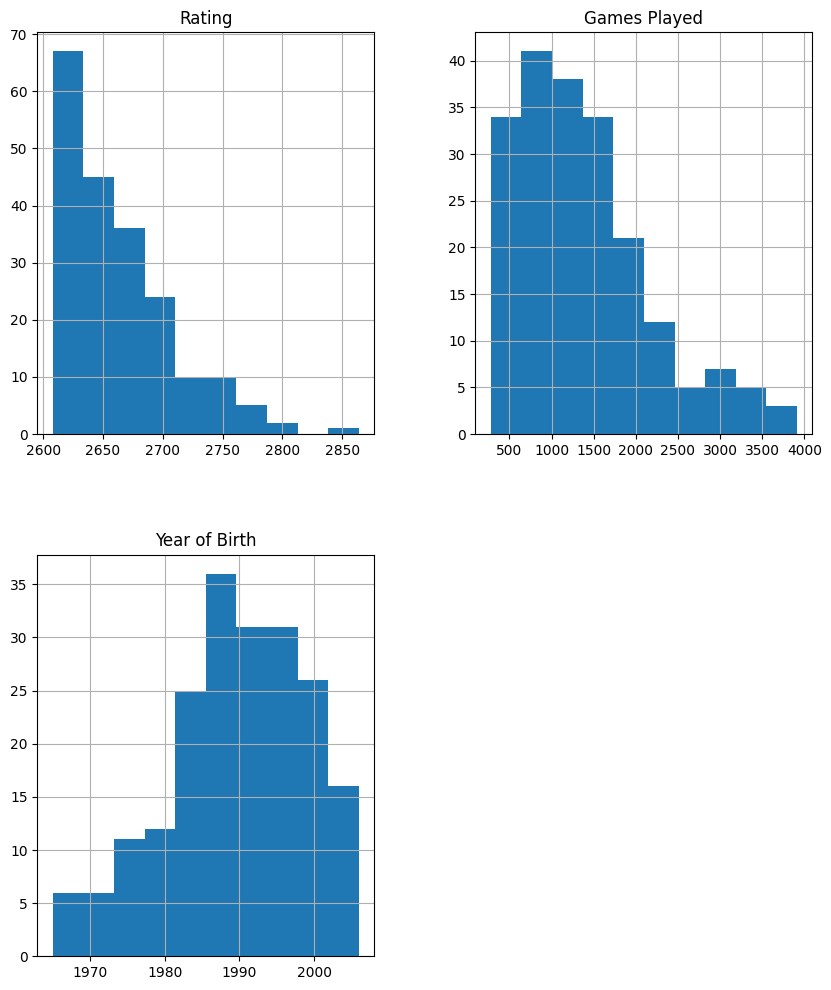

In [29]:
numericData.hist(figsize=(10, 12))


[]

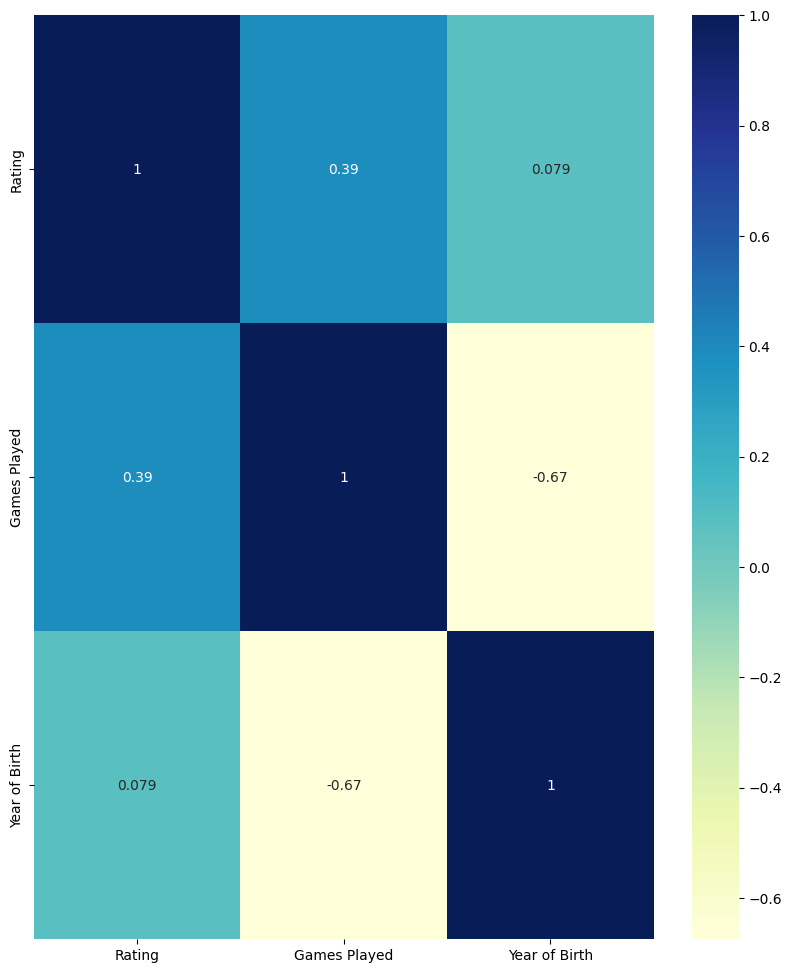

In [30]:
plt.figure(figsize=(10, 12))
dataPlot = sns.heatmap(numericData.corr(), cmap="YlGnBu", annot=True)
plt.plot()


# 5. Lab Assignment 2 

In [31]:
a = torch.tensor([5.], requires_grad=True)
b = torch.tensor([6.], requires_grad=True)

y = a ** 3 - b ** 2
print(y)


tensor([89.], grad_fn=<SubBackward0>)


In [32]:
y.backward()


In [33]:
a.grad


tensor([75.])

In [34]:
b.grad


tensor([-12.])

In [35]:
# Simulating simple linear regression
W = torch.randn(1, 9, requires_grad=True)
b = torch.randn(1, requires_grad=True)
y = torch.randn(9, 1, requires_grad=True)

output = torch.matmul(W, y) + b
loss = 1 - output
print(loss, output)


tensor([[2.8157]], grad_fn=<RsubBackward1>) tensor([[-1.8157]], grad_fn=<AddBackward0>)


In [36]:
loss.backward()


In [37]:
W.grad


tensor([[-1.7265, -0.7480,  0.9181, -0.7810,  1.3757,  2.8947,  1.6588,  0.9331,
         -0.7216]])

Creating a dataset using sklearn.

In [38]:
from sklearn.datasets import make_classification


In [39]:
class CustomDataset:
    def __init__(self, data, targets):
        self.data = data
        self.targets = targets

    def __len__(self):
        return self.data.shape[0]

    def __getitem__(self, idx):
        current_data = self.data[idx, :]
        current_target = self.targets[idx]

        return {
            "sample": torch.tensor(current_data, dtype=torch.float),
            "target": torch.tensor(current_target, dtype=torch.float)
        }


In [40]:
X_train, Y_train = make_classification(1000)


In [41]:
custom = CustomDataset(data=X_train, targets=Y_train)
custom[0]


{'sample': tensor([ 1.0411, -0.6880, -0.6694, -0.8868, -0.7512, -1.3458,  0.9538,  0.2731,
          0.5096, -0.1899, -1.0362, -1.1995,  0.3086, -0.1615,  0.6464, -0.0151,
          1.2810,  0.3692,  1.7815, -0.5149]),
 'target': tensor(0.)}

In [42]:
for idx in range(len(custom)):
    print(custom[idx])
    break


{'sample': tensor([ 1.0411, -0.6880, -0.6694, -0.8868, -0.7512, -1.3458,  0.9538,  0.2731,
         0.5096, -0.1899, -1.0362, -1.1995,  0.3086, -0.1615,  0.6464, -0.0151,
         1.2810,  0.3692,  1.7815, -0.5149]), 'target': tensor(0.)}


Implementing and displaying the Data Loader.

In [43]:
train_loader = torch.utils.data.DataLoader(custom, batch_size=4, num_workers=2)


In [44]:
train_loader

In [45]:
for data in train_loader:
    print(data)
    break
